# Принятие решений в бизнесе на основе данных

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных 

**Файл hypothesis.csv:**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл orders.csv:**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл visitors.csv:**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Задачи и ход исследования

**Часть 1. Приоритизация гипотез.**
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задачи:**
- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**Часть 2. Анализ A/B-теста**
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

**Задачи:**
- Проанализируем A/B-тест:
1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примим решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Изучение общей информации о данных

- Подгрузим библиотеки и датасеты.
- Проверим название колонок, структуру таблиц, формат таблицы, наличие пустых строк, наличие дубликатов и нулевых объектов, наличие пропусков и описание числовых данных

In [1]:
import pandas as pd
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import os
import datetime as dt
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
try:
    hypothesis = pd.read_csv('C:\\Users\\User\\Downloads\\hypothesis.csv')
    orders = pd.read_csv('C:\\Users\\User\\Downloads\\orders.csv')
    visitors = pd.read_csv('C:\\Users\\User\\Downloads\\visitors.csv')

except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

4.1. **Изучим таблицу "hypothesis"**

In [3]:
display(hypothesis.columns) # название колонок
display(hypothesis.head())# структуру таблицы
display(hypothesis.info())# состав таблицы, формат столбцов, наличие пустых строк
display(hypothesis.duplicated().sum()) # наличие дубликатов
display(pd.DataFrame(round((hypothesis.isna().mean()*100),2)).style.background_gradient('coolwarm'))# наличие пропусков
display(hypothesis.describe()) # описание числовых данных

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

0

,0
Hypothesis,0
Reach,0
Impact,0
Confidence,0
Efforts,0


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


Данные в порядке. Никаких проблем нет.

4.2. **Изучим таблицу "orders"**

In [4]:
display(orders.columns) # название колонок
display(orders.head())# структуру таблицы
display(orders.info())# состав таблицы, формат столбцов, наличие пустых строк
display(orders.duplicated().sum()) # наличие дубликатов
display(pd.DataFrame(round((orders.isna().mean()*100),2)).style.background_gradient('coolwarm'))# наличие пропусков
display(orders.describe()) # описание числовых данных

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0

,0
transactionId,0
visitorId,0
date,0
revenue,0
group,0


,transactionId,visitorId,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


In [5]:
#Дополнительно проверим пользователей на пересечение в группах 
ab = orders.groupby('visitorId', as_index=False).agg({'group':'nunique'})
ab.query('group == 2').count()

visitorId    58
group        58
dtype: int64

1. Возможно, что формат даты нужно будет поменять.
2. Есть анормальные значения. Их изучим позже.
3. У нас имеется пересечение по 58 пользователям, что составляет 4,9 процента от общей выборки. По идее, этих пользователей можно удалить из таблицы, но рисковать не будем

4.3. **Изучим таблицу "visitors"**

In [6]:
display(visitors.columns) # название колонок
display(visitors.head())# структуру таблицы
display(visitors.info())# состав таблицы, формат столбцов, наличие пустых строк
display(visitors.duplicated().sum()) # наличие дубликатов
display(pd.DataFrame(round((visitors.isna().mean()*100),2)).style.background_gradient('coolwarm'))# наличие пропусков
display(visitors.describe()) # описание числовых данных

Index(['date', 'group', 'visitors'], dtype='object')

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

0

,0
date,0
group,0
visitors,0


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


Опять таки, возможно придется изменить формат даты. В остальном все ок.

## Часть 1.

# 5.1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [7]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00


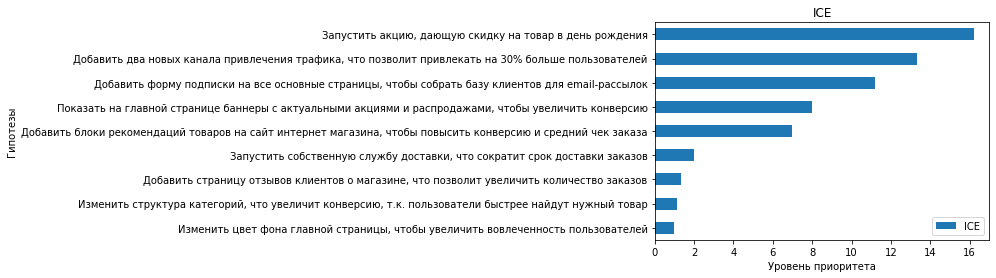

In [8]:
#Дополнительно построим график
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Уровень приоритета')
ax.set_ylabel('Гипотезы')
ax.set_title('ICE')
plt.show()

**После применения фреймворка ICE можно выделить две основные гипотезы: "Запустить акцию, дающую скиду на товар в день рождения" (гипотеза № 8), и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (гипотеза № 0).**

# 5.2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [9]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20


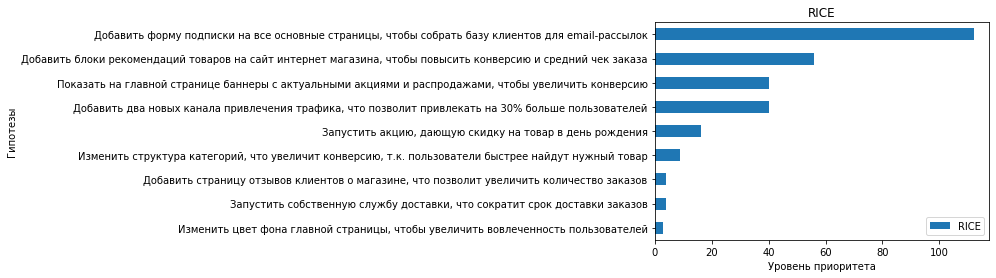

In [10]:
#Дополнительно построим график
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Уровень приоритета')
ax.set_ylabel('Гипотезы')
ax.set_title('RICE')
plt.show()

**Ситуация сильно изменилась, гипотеза № 8 больше не в топе. В топ-3 продолжает удерживаться гипотеза № 0**

# 5.3. Скажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**RICE включает в себя показатель охвата аудитории, изменение в рейтинге произошли по причинам:**
1. Вперед у нас вырвались гипотезы 7 и 2 имеющие самый высокий параметр reach.
2. Гипотеза № 0 осталась в топ три за счет самого высокого показателя impact = 10*
3. У остальных гипотез уровень охвата по аудитории значительно ниже.

## Часть 2. А/B тест.

**6.1. Предподготовка данных**

**6.1.1. Таблица "Orders"**

In [11]:
#Изменим формат даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


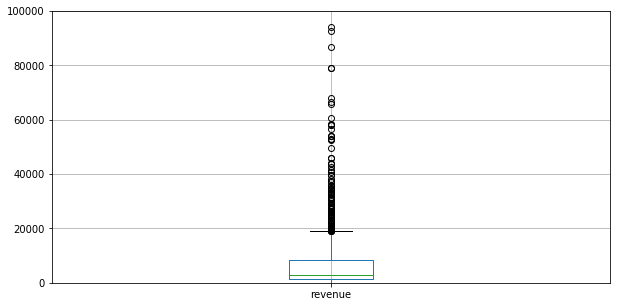

In [13]:
#Изучим выбросы в столбце "revenue"
plt.figure(figsize=(10, 5))
orders.boxplot('revenue')
plt.ylim(0, 100000)
plt.show()

In [14]:
#Изучим выбросы отдельно по группам
orders_a = orders[orders['group']=='A']
orders_b = orders[orders['group']=='B']

In [15]:
display(orders_a.describe())
display(orders_b.describe())

,transactionId,visitorId,revenue
count,557.00,557.00,557.00
mean,"2,138,647,798.14","2,175,108,950.87","7,333.58"
std,"1,238,140,014.68","1,228,118,317.97","11,847.55"
min,"1,062,393.00","8,300,375.00",50.00
25%,"1,157,343,706.00","1,110,543,778.00","1,188.00"
50%,"2,076,434,956.00","2,232,111,114.00","3,000.00"
75%,"3,252,142,918.00","3,160,828,523.00","8,280.00"
max,"4,293,855,558.00","4,278,982,564.00","93,940.00"


,transactionId,visitorId,revenue
count,640.00,640.00,640.00
mean,"2,170,393,710.80","2,157,997,821.34","9,230.88"
std,"1,221,926,749.51","1,243,750,260.43","52,449.77"
min,"4,919,758.00","5,114,589.00",50.00
25%,"1,171,414,746.75","1,115,858,045.25","1,312.50"
50%,"2,215,003,285.00","2,183,398,384.50","2,965.00"
75%,"3,228,031,572.75","3,185,798,028.50","8,355.25"
max,"4,261,512,099.00","4,283,872,382.00","1,294,500.00"


Text(0.5, 0, 'Выручка')

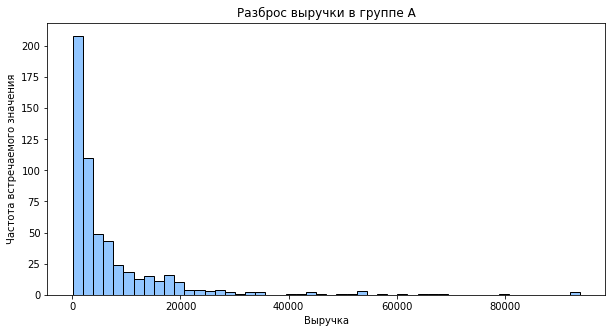

In [16]:
#Дополнительно построим график для группы А
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-pastel')
orders_a['revenue'].plot(kind='hist', ec='black', bins=50);
plt.title('Разброс выручки в группе A')
plt.ylabel('Частота встречаемого значения')
plt.xlabel('Выручка')

Text(0.5, 0, 'Выручка')

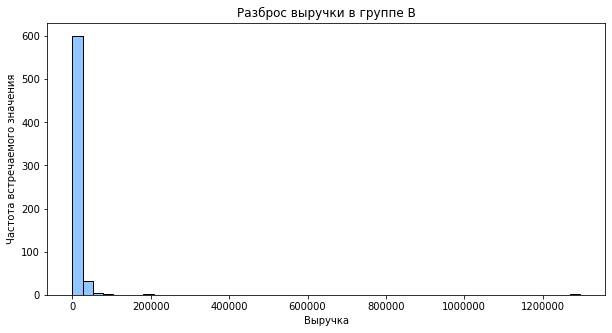

In [17]:
#Дополнительно построим график для группы B
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-pastel')
orders_b['revenue'].plot(kind='hist', ec='black', bins=50);
plt.title('Разброс выручки в группе B')
plt.ylabel('Частота встречаемого значения')
plt.xlabel('Выручка')

1. Мы изменили формат даты.
2. Выяснели, что распределение показателей группы А – имеет более широкий диапазон.
3. Установили, что в группе B имеется выручка с аномально большим значением.


**6.1.2. Таблица "visitors"**

In [18]:
#Изменим формат даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


1. Формат даты изменен. Других проблем с этой таблицой не было.

# 6.2. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Функция для коммулятивного сложения**

In [21]:
# выводим сводную таблицу с группой датой и суммой выручки
revenue_date_a_b =(orders.groupby(['group', 'date']).agg({'revenue':'sum', 'transactionId':'nunique', 'visitorId':'nunique' })
                   .sort_values('date').reset_index())
revenue_date_a_b.columns = ['group','date', 'revenue', 'orders_sum', 'buyers_sum']
# оставляем только группу А
revenue_date_a = revenue_date_a_b[revenue_date_a_b['group'] == 'A'].reset_index()
# фукцией .cumsum() коммулятивно складываем выручку
revenue_date_a['revenue_cumsum'] = revenue_date_a['revenue'].cumsum()
revenue_date_b = revenue_date_a_b[revenue_date_a_b['group'] == 'B'].reset_index()
revenue_date_b['revenue_cumsum'] = revenue_date_b['revenue'].cumsum()
display(revenue_date_a_b.head())
display(revenue_date_a.head())

display(revenue_date_b.head())

,group,date,revenue,orders_sum,buyers_sum
0,A,2019-08-01,148579,24,20
1,B,2019-08-01,101217,21,20
2,A,2019-08-02,93822,20,19
3,B,2019-08-02,165531,24,23
4,A,2019-08-03,112473,24,24


,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum
0,0,A,2019-08-01,148579,24,20,148579
1,2,A,2019-08-02,93822,20,19,242401
2,4,A,2019-08-03,112473,24,24,354874
3,6,A,2019-08-04,70825,16,15,425699
4,8,A,2019-08-05,124218,25,25,549917


,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum
0,1,B,2019-08-01,101217,21,20,101217
1,3,B,2019-08-02,165531,24,23,266748
2,5,B,2019-08-03,114248,16,16,380996
3,7,B,2019-08-04,108571,17,16,489567
4,9,B,2019-08-05,92428,23,23,581995


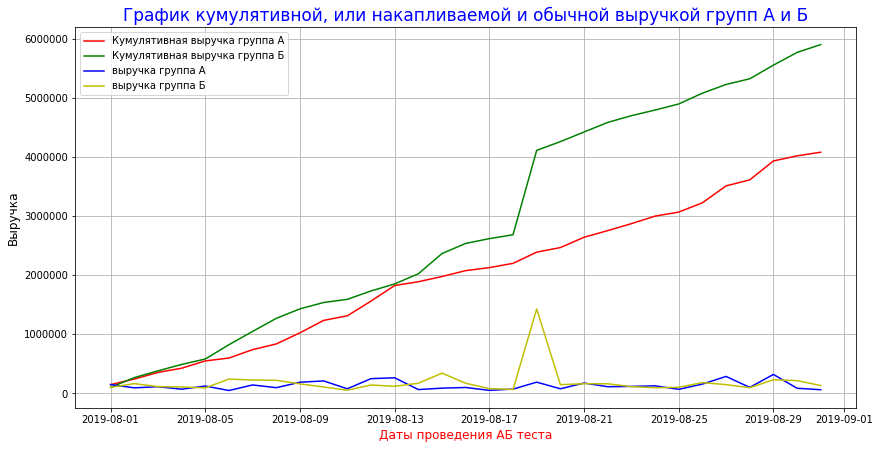

In [22]:
#Построим график
plt.figure(figsize=(14, 7))
plt.plot(revenue_date_a['date'], revenue_date_a['revenue_cumsum'], '-r');
plt.plot(revenue_date_b['date'], revenue_date_b['revenue_cumsum'], '-g');
plt.plot(revenue_date_a['date'], revenue_date_a['revenue'], '-b');
plt.plot(revenue_date_b['date'], revenue_date_b['revenue'], '-y');
plt.title('График кумулятивной, или накапливаемой и обычной выручкой групп А и Б', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Выручка',fontsize=12, color='black')
plt.legend([ 'Кумулятивная выручка группа А', 'Кумулятивная выручка группа Б', 'выручка группа А', 'выручка группа Б'])
plt.grid(True)
plt.show()

In [23]:
#Изучим выброс в группе B
revenue_date_b['revenue'].max()

1429920

1. Имеется линейный график роста по комулятивной выручке.
2. Из-за выброса в группе Б в одну из дат, у нас имеется резкий скачок на графике.

# 6.3. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

In [24]:
revenue_date_a['orders_cumsum'] = revenue_date_a['orders_sum'].cumsum()
revenue_date_b['orders_cumsum'] = revenue_date_b['orders_sum'].cumsum()
display(revenue_date_a.head())
display(revenue_date_b.head())

,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum,orders_cumsum
0,0,A,2019-08-01,148579,24,20,148579,24
1,2,A,2019-08-02,93822,20,19,242401,44
2,4,A,2019-08-03,112473,24,24,354874,68
3,6,A,2019-08-04,70825,16,15,425699,84
4,8,A,2019-08-05,124218,25,25,549917,109


,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum,orders_cumsum
0,1,B,2019-08-01,101217,21,20,101217,21
1,3,B,2019-08-02,165531,24,23,266748,45
2,5,B,2019-08-03,114248,16,16,380996,61
3,7,B,2019-08-04,108571,17,16,489567,78
4,9,B,2019-08-05,92428,23,23,581995,101


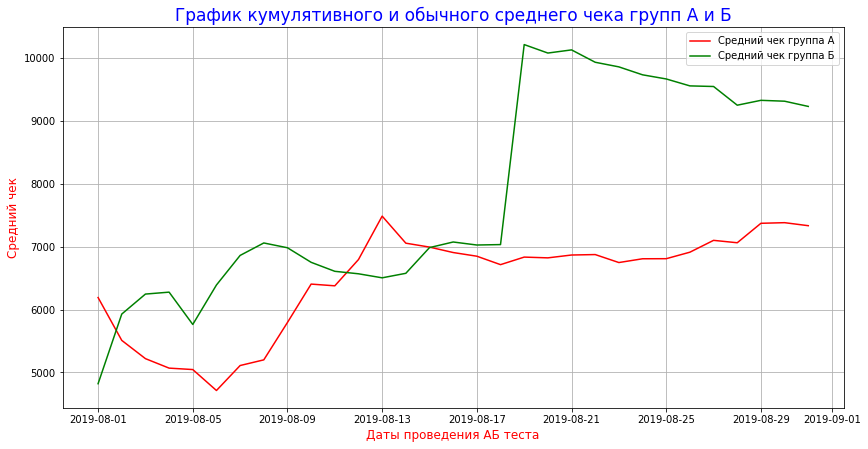

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(revenue_date_a['date'], revenue_date_a['revenue_cumsum']/revenue_date_a['orders_cumsum'], '-r');
plt.plot(revenue_date_b['date'], revenue_date_b['revenue_cumsum']/revenue_date_b['orders_cumsum'], '-g');
#plt.plot(revenue_date_a['date'], revenue_date_a['revenue']/revenue_date_a['orders_sum'], '-b');
#plt.plot(revenue_date_b['date'], revenue_date_b['revenue']/revenue_date_b['orders_sum'], '-y');
plt.title('График кумулятивного и обычного среднего чека групп А и Б', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Средний чек',fontsize=12, color='red')
plt.legend([ 'Средний чек группа А', 'Средний чек группа Б', 'Средний чек А', 'Средний чек группа Б'])
plt.grid(True)
plt.show()

**Имеются сильные колебания в показателях среднего чека. Выводы делать рано, но возможно дело в выбросах**

# 6.4. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

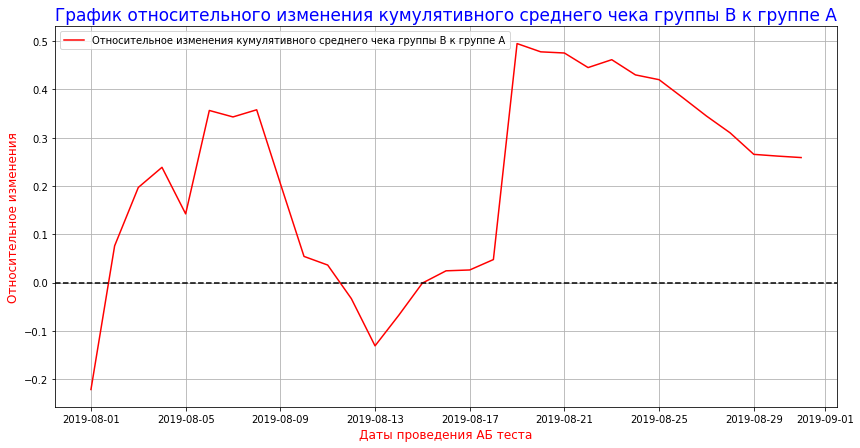

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(revenue_date_b['date'], ((revenue_date_b['revenue_cumsum']/revenue_date_b['orders_cumsum'])
                                   /(revenue_date_a['revenue_cumsum']/revenue_date_a['orders_cumsum'])-1), '-r');
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Относительное изменения',fontsize=12, color='red')
plt.legend([ 'Относительное изменения кумулятивного среднего чека группы B к группе A', 'Средний чек группа Б'])
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.show()

**Колебания, как были, так и остались. Возможная причина остается прежней - вбросы.**

# 6.5.  Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

In [27]:
#отсортируем по группам
visitors_a = visitors[visitors['group'] == 'A']
visitors_b = visitors[visitors['group'] == 'B']

In [28]:
#Соеденим таблицы
revenue_date_a = revenue_date_a.merge(visitors_a, on=['date', 'group'])
revenue_date_b = revenue_date_b.merge(visitors_b, on=['date', 'group'])
display(revenue_date_a.head())
display(revenue_date_b.head())

,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum,orders_cumsum,visitors
0,0,A,2019-08-01,148579,24,20,148579,24,719
1,2,A,2019-08-02,93822,20,19,242401,44,619
2,4,A,2019-08-03,112473,24,24,354874,68,507
3,6,A,2019-08-04,70825,16,15,425699,84,717
4,8,A,2019-08-05,124218,25,25,549917,109,756


,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum,orders_cumsum,visitors
0,1,B,2019-08-01,101217,21,20,101217,21,713
1,3,B,2019-08-02,165531,24,23,266748,45,581
2,5,B,2019-08-03,114248,16,16,380996,61,509
3,7,B,2019-08-04,108571,17,16,489567,78,770
4,9,B,2019-08-05,92428,23,23,581995,101,707


In [29]:
#Считаем конверсию
revenue_date_a['visitors_cumsum'] = revenue_date_a['visitors'].cumsum()
revenue_date_a['conversion_cumsum'] = revenue_date_a['orders_cumsum']/revenue_date_a['visitors_cumsum']

revenue_date_b['visitors_cumsum'] = revenue_date_b['visitors'].cumsum()
revenue_date_b['conversion_cumsum'] = revenue_date_b['orders_cumsum']/revenue_date_a['visitors_cumsum']
display(revenue_date_a.head())
display(revenue_date_b.head())

,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum,orders_cumsum,visitors,visitors_cumsum,conversion_cumsum
0,0,A,2019-08-01,148579,24,20,148579,24,719,719,0.03
1,2,A,2019-08-02,93822,20,19,242401,44,619,1338,0.03
2,4,A,2019-08-03,112473,24,24,354874,68,507,1845,0.04
3,6,A,2019-08-04,70825,16,15,425699,84,717,2562,0.03
4,8,A,2019-08-05,124218,25,25,549917,109,756,3318,0.03


,index,group,date,revenue,orders_sum,buyers_sum,revenue_cumsum,orders_cumsum,visitors,visitors_cumsum,conversion_cumsum
0,1,B,2019-08-01,101217,21,20,101217,21,713,713,0.03
1,3,B,2019-08-02,165531,24,23,266748,45,581,1294,0.03
2,5,B,2019-08-03,114248,16,16,380996,61,509,1803,0.03
3,7,B,2019-08-04,108571,17,16,489567,78,770,2573,0.03
4,9,B,2019-08-05,92428,23,23,581995,101,707,3280,0.03


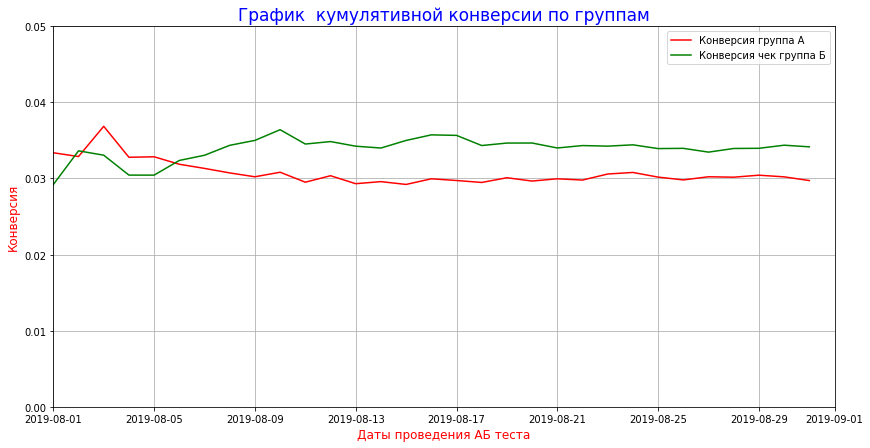

In [30]:
#Строим график
plt.figure(figsize=(14, 7))
plt.plot(revenue_date_a['date'], revenue_date_a['conversion_cumsum'], '-r');
plt.plot(revenue_date_b['date'], revenue_date_b['conversion_cumsum'], '-g');
plt.title('График  кумулятивной конверсии по группам', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Конверсия',fontsize=12, color='red')
plt.legend([ 'Конверсия группа А', 'Конверсия чек группа Б'])

plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]) 
plt.grid(True)
plt.show()

**Конверсия группы А в долгосрочной перспективе проигрывает группе B**

# 6.6.  Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

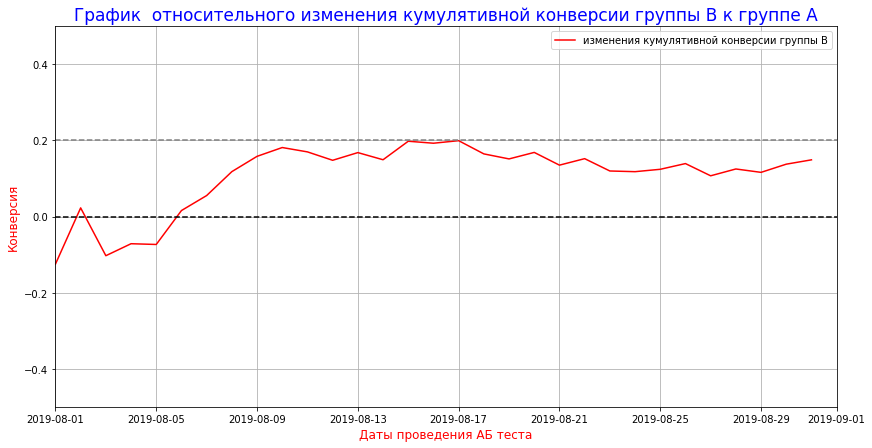

In [31]:
#Строим график
plt.figure(figsize=(14, 7))
plt.plot(revenue_date_a['date'],  revenue_date_b['conversion_cumsum']/revenue_date_a['conversion_cumsum']-1, '-r');

plt.title('График  относительного изменения кумулятивной конверсии группы B к группе A', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Конверсия',fontsize=12, color='red')
plt.legend([ 'изменения кумулятивной конверсии группы B'])

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5]) 
plt.grid(True)
plt.show()

**Группа B продолжает доминировать в нашем исследовании)**

# 6.7.  Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [32]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [33]:
orders_per_user = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})\
                         .rename(columns={'transactionId':'orders'})

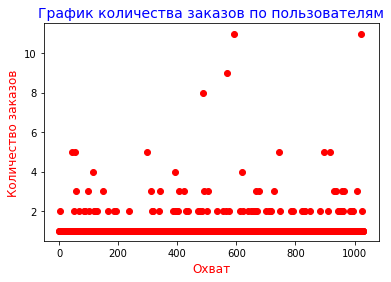

In [34]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.title('График количества заказов по пользователям', fontsize=14, color='blue')
plt.xlabel('Охват',fontsize=12, color='red')
plt.ylabel('Количество заказов',fontsize=12, color='red')
plt.show()

**Большинство клиентов делало по одному заказ, но мы видим что есть два и более заказов**

# 6.8.  Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [35]:
display(np.percentile(orders_per_user['orders'], [90, 95, 99])) 

array([1., 2., 4.])

**Значения по количеству покупок больше 4, можно отнести к числу аномальных. (1 %)**

# 6.9.  Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

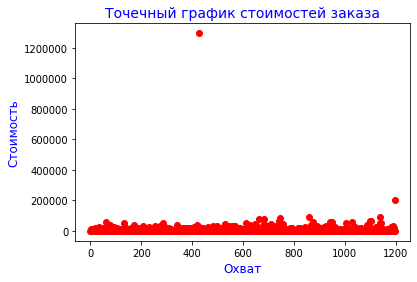

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.title('Точечный график стоимостей заказа', fontsize=14, color='blue')
plt.xlabel('Охват',fontsize=12, color='blue')
plt.ylabel('Стоимость',fontsize=12, color='blue')
plt.show()

**Cтоимость заказов лежит в диапозоне с 100 000 до 200 000, при этом имеется один отчетлевый выброс.**

# 6.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.

In [37]:
display(np.percentile(orders['revenue'], [90, 95, 99])) 

array([18168. , 28000. , 58233.2])

**Все, что за 99 перцентилем — аномально.**

# 6.10.  Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

In [38]:
conversion = (orders.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.03
1,B,640,18916,0.03


In [39]:
# Воспользуемся критерием Манна-Уитни
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha = 0.05
results = st.mannwhitneyu(conversion[conversion['group']=='A']['conversion'], conversion[conversion['group']=='B']['conversion'], alternative="two-sided")
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  1.0
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [40]:
display("Грязные данные Конверсия группы В больше чем конверсия группы А на {0:.1%}".format(conversion[conversion['group']=='B']['conversion'].sum()/conversion[conversion['group']=='A']['conversion'].sum()-1))

'Грязные данные Конверсия группы В больше чем конверсия группы А на 13.8%'

# 6.11.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

In [41]:
#Ради интереса для начала гляним на средние чеки
display(orders[orders['group']=='A']['revenue'].mean())
display(orders[orders['group']=='B']['revenue'].mean())

7333.578096947936

9230.875

In [42]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B
# H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.7292909855432458
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [43]:
display("Грязные данные Средний чек группы В больше чем средний чек группы А на {0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'Грязные данные Средний чек группы В больше чем средний чек группы А на 25.9%'

# 6.12.  Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Освежим память:
- 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям.
- 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

In [44]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitorId'].to_list()
outlaws_1p

[199603092,
 237748145,
 457167155,
 1230306981,
 1614305549,
 2038680547,
 2378935119,
 2458001652,
 2587333274,
 3062433592,
 3717692402,
 3803269165,
 4256040402]

In [45]:
# Зачистим данные
orders_temp = orders[~orders['visitorId'].isin(outlaws_1p)]
conversion_clear = (orders_temp.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion_clear['conversion'] = conversion_clear['orders'] / conversion_clear['visitors']

In [46]:
conversion_clear.head()

,group,orders,visitors,conversion
0,A,517,18736,0.03
1,B,599,18916,0.03


In [47]:
# Воспользуемся критерием Манна-Уитни
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha = 0.05
results = st.mannwhitneyu(conversion_clear[conversion_clear['group']=='A']['conversion'], conversion_clear[conversion_clear['group']=='B']['conversion'], alternative="two-sided")
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  1.0
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [48]:
display("Чистые данные Конверсия группы В больше чем конверсия группы А на {0:.1%}".format(conversion_clear[conversion_clear['group']=='B']['conversion'].sum()/conversion_clear[conversion_clear['group']=='A']['conversion'].sum()-1))

'Чистые данные Конверсия группы В больше чем конверсия группы А на 14.8%'

# 6.13.  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [49]:
#Чистка
orders_clear = orders.query('revenue <= 58233')

In [50]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B
# H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B
alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'], alternative="two-sided")
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.6208626966847455
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [51]:
display("Чистые данные Средний чек группы В больше чем средний чек группы А на {0:.1%}".format(orders_clear[orders_clear['group']=='B']['revenue'].mean()/orders_clear[orders_clear['group']=='A']['revenue'].mean()-1))

'Чистые данные Средний чек группы В больше чем средний чек группы А на 1.9%'

# 6.14.  Примим решение по результатам теста и объясним его

**Тест остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B статистически значимо улучшиться относительно сегмента A крайне низкая**